In [17]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [18]:
# Parameters
d = 1
k = 1
deltas = np.arange(1, 21) / 100
N = 100

# Computed Parameters
ranges = ((a, b),) * d
phi = rad.Wendland(d, k)
xc = rad.gridn(ranges, N, flat=True)
integrator = rad.integrate.MeanIntegrator(ranges, 2000)
# integrator = rad.integrate.QuadIntegrator(ranges, epsabs=1e-3, epsrel=1e-3)

# Data collection
results = np.zeros((np.size(deltas), 2))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    solver = rad.solve.HelmholtzSolver(integrator, phi, delta, *xc)
    approx = solver.solve(f)
    error = rad.error(exact, approx, integrator)
    cond = solver.cond()
    
    results[i,0] = error 
    results[i, 1] = solver.cond()
    
    print("Delta:", delta)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

Delta: 0.01
  L2 Relative Error: 0.9960486117275932
  Condition Number: 7.940868899268669
Delta: 0.02
  L2 Relative Error: 0.538671948414534
  Condition Number: 212.57886325872994
Delta: 0.03
  L2 Relative Error: 0.5093752263612477
  Condition Number: 1112.2083227571338
Delta: 0.04
  L2 Relative Error: 0.5193105121651954
  Condition Number: 1584.6630066905198
Delta: 0.05
  L2 Relative Error: 0.32486379235921903
  Condition Number: 8131.763967069979
Delta: 0.06
  L2 Relative Error: 0.18821580349451641
  Condition Number: 14066.744053819326
Delta: 0.07
  L2 Relative Error: 0.10427530003713488
  Condition Number: 58109.38080741579
Delta: 0.08
  L2 Relative Error: 0.055965153334226976
  Condition Number: 93880.12128140329
Delta: 0.09
  L2 Relative Error: 0.027018395966621193
  Condition Number: 245233.49379329002
Delta: 0.1
  L2 Relative Error: 0.009397931832287019
  Condition Number: 372280.7753761892
Delta: 0.11
  L2 Relative Error: 0.002017704701261272
  Condition Number: 754215.0009789

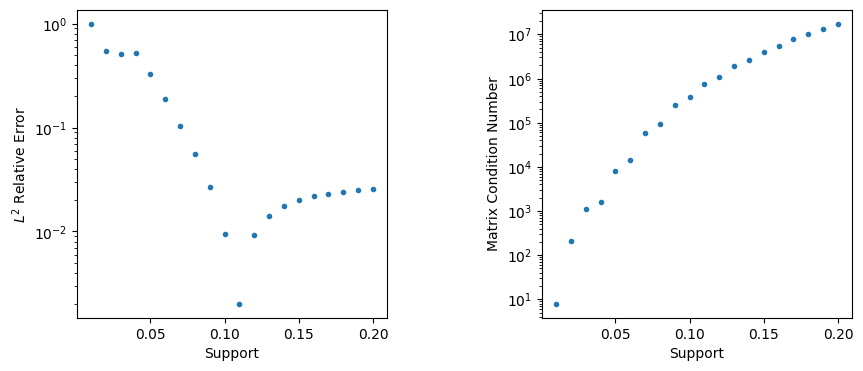

In [19]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("Support")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], '.')

axs[1].set_xlabel("Support")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()